<a href="https://colab.research.google.com/github/relihimas/raks/blob/master/Recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise sobre Receitas e Despesas da Prefeitura do Recife de 2002 a 2019**


Recife, fundada em 12 de Março de 1537, é a capital do Estado de Pernambuco. Possui cerca de 1.645.727 habitantes (segundo senso IBGE de 2019), é o nono maior município brasileiro acima de cem mil habitantes, oitavo maior na lista de cem mais populosos e quadragésimo sexto em área urbana (142.348 km²). Com o apelido de Veneza Brasileira, Recife é uma cidade de rica cultura, histórias, gastronomia e gente, sendo considerada a capital do Nordeste.

Sua economia é baseada no Turismo, Comércio, Serviços e Indústria. Possui um dos maiores polos de tecnologia do país, conhecido como Porto Digital, onde abriga várias empresas de tecnologia. (continuar)

Através da análise dos dados disponibilizados pela própria prefeitura e outras instituições públicas, queremos destacar alguns pontos, positivos e/ou negativos, além de outras informações provenientes que possam gerar novas perspectivas para gestores e cidadãos, analisando a seguinte questão:

As receitas previstas e arrecadadas pela Prefeitura do Recife, de 2002 a 2019, impactaram positivamente ou negativamente com as taxas de crescimento do PIB da cidade, redução do desemprego e ajuste salarial da população? 

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
import numpy as np

# **Receitas (2002 a 2019)**

In [0]:
# Importando a base de dados referente às Receitas
rec = pd.read_csv('agregado.csv', sep=';', encoding='latin-1', usecols = ['ano',  'fonte_origem_receita_nome', 'receita_prevista', 'receita_prevista_acrescimo', 'receita_prevista_atualizada', 'receita_arrecadada'])

In [0]:
# Verificando quais colunas iremos usar e recarregar a base
rec.columns.to_list()

['ano',
 'fonte_origem_receita_nome',
 'receita_prevista',
 'receita_prevista_acrescimo',
 'receita_prevista_atualizada',
 'receita_arrecadada']

In [0]:
# Verificando quais tipos de dados tempos na nossa base
rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65483 entries, 0 to 65482
Data columns (total 6 columns):
ano                            65483 non-null int64
fonte_origem_receita_nome      65483 non-null object
receita_prevista               65483 non-null int64
receita_prevista_acrescimo     65483 non-null float64
receita_prevista_atualizada    65483 non-null float64
receita_arrecadada             65483 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.0+ MB


In [0]:
# transformando ano em string
rec.ano = rec.ano.astype('str')

In [0]:
# Verificando a quantidade de células vazias
rec.isnull().sum()

ano                            0
fonte_origem_receita_nome      0
receita_prevista               0
receita_prevista_acrescimo     0
receita_prevista_atualizada    0
receita_arrecadada             0
dtype: int64

In [0]:
# receita prevista
gp1 = rec.groupby(by='ano')['receita_prevista'].sum()
gp1 = gp1.reset_index()
gp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
ano                 18 non-null object
receita_prevista    18 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [0]:
# receita arrecadada
gp2 = rec.groupby(by='ano')['receita_arrecadada'].sum()
gp2 = gp2.reset_index()
gp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
ano                   18 non-null object
receita_arrecadada    18 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [0]:
# receita atualizada
gp3 = rec.groupby(by='ano')['receita_prevista_atualizada'].sum()
gp3 = gp3.reset_index()
gp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
ano                            18 non-null object
receita_prevista_atualizada    18 non-null float64
dtypes: float64(1), object(1)
memory usage: 416.0+ bytes


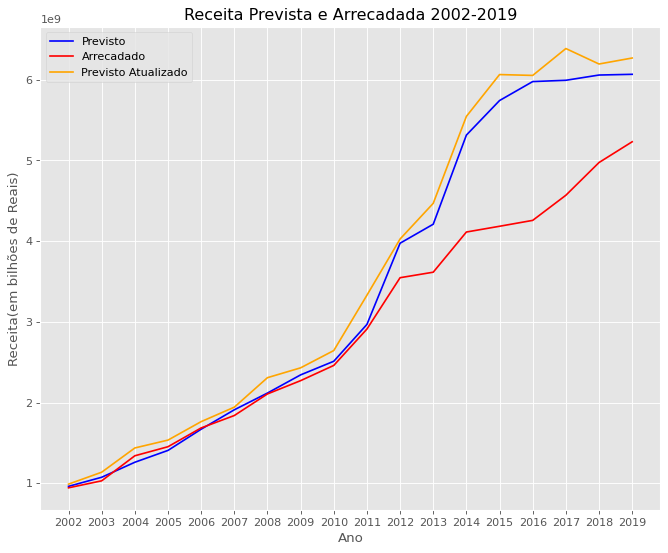

In [0]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(gp1['ano'], gp1['receita_prevista'], label='Previsto', color = 'blue')
plt.plot(gp2['ano'], gp2['receita_arrecadada'], label='Arrecadado',color = 'red')
plt.plot(gp3['ano'], gp3['receita_prevista_atualizada'], label='Previsto Atualizado', color = 'orange')
plt.legend(['Previsto', 'Arrecadado','Previsto Atualizado'])
plt.title('Receita Prevista e Arrecadada 2002-2019')
plt.ylabel('Receita(em bilhões de Reais)')
plt.xlabel('Ano')
plt.show()

In [0]:
dif = gp3['receita_prevista_atualizada'].sub(gp2['receita_arrecadada'])

In [0]:
dif['ano'] = gp3['ano']

In [0]:
dif['ano'].set_index

In [0]:
dif

In [0]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dif, label='Diferença', color = 'red')
plt.title('Diferença Prevista e Arrecadada 2002-2019')
plt.ylabel('Receita(em bilhões de Reais)')
plt.xlabel('Ano')
plt.show()

## **Comparativo das Fontes entre Previsto e Arrecadado**

In [0]:
# Receita arrecadada por fonte
gp4 = rec.groupby(by='fonte_origem_receita_nome')['receita_arrecadada'].sum()
gp4 = gp4.reset_index()

In [0]:
# Receita prevista por fonte
gp5 = rec.groupby(by='fonte_origem_receita_nome')['receita_prevista_atualizada'].sum()
gp5 = gp5.reset_index()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0,

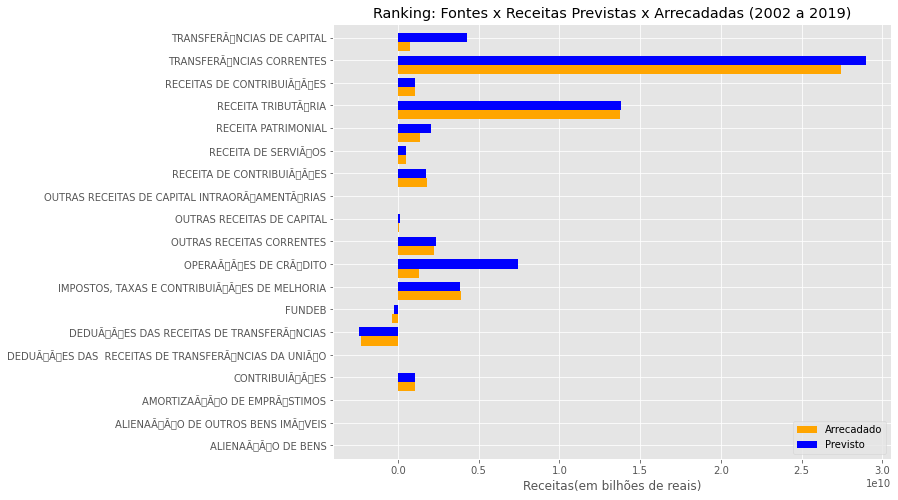

In [0]:
# Barchart horizontal comparativo
fig, ax = plt.subplots(figsize=(10, 8))
ind = np.arange(len(gp4))
width = 0.4
height = gp4['receita_arrecadada']
y_pos = gp4['fonte_origem_receita_nome']
y_pos2 = gp5['fonte_origem_receita_nome']
height2 = gp5['receita_prevista_atualizada']
ax.barh(ind, height, width, color='orange', label='Arrecadado')
ax.barh(ind + width, height2, width, color='blue', label='Previsto')
ax.set(yticks=ind + width, yticklabels=y_pos, ylim=[2*width - 1, len(gp4)])
ax.legend()
plt.xlabel('Receitas(em bilhões de reais)')
plt.title('Ranking: Fontes x Receitas Previstas x Arrecadadas (2002 a 2019)')
plt.show()

Ações recomendadas para melhoria:

1 - Dividir as previsões e arrecadações de Receitas, por bairro. Tendo uma maior granularidade para criar ações mais assertivas e individuais.

# **PIB (2002 a 2017)**

In [0]:
# carregando a base referente ao pib
pib = pd.read_csv('PIBRecife.csv', sep = ';', encoding = 'latin-1')

In [0]:
# info da base
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
Ano                  16 non-null int64
Nome do Município    16 non-null object
PIB                  16 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 512.0+ bytes


In [0]:
# realizando alterações de tipo
pib.Ano = pib.Ano.astype('str')
pib.PIB = pib.PIB.astype('float64')

Text(0.5, 0, 'Ano')

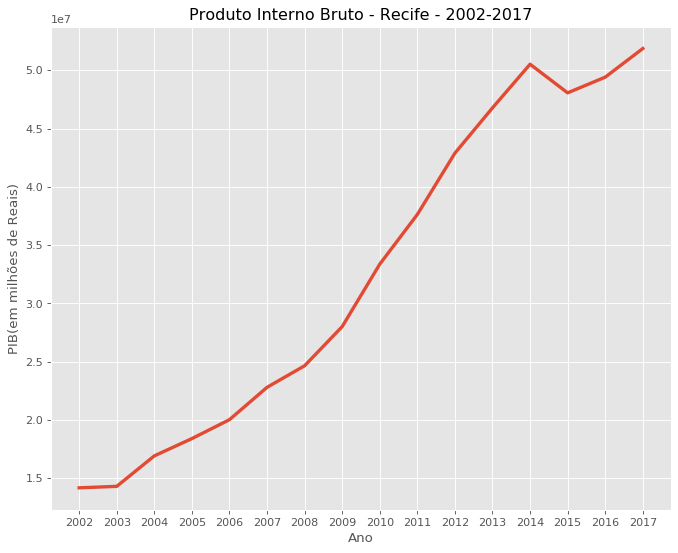

In [0]:
# gráfico
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pib['Ano'], pib['PIB'], linewidth=3)
plt.bar(gp1['ano'], gp1['receita_prevista'], label='Previsto', color = 'blue')
plt.title('Produto Interno Bruto - Recife - 2002-2017')
plt.ylabel('PIB(em milhões de Reais)')
plt.xlabel('Ano')

# **Despesas (2002 a 2019)**



In [0]:
# carregando as bases de dados
desp1 = pd.read_csv(f'recife-dados-despesas-2002.csv', sep=';', encoding='latin-1')
desp2 = pd.read_csv(f'recife-dados-despesas-2003.csv', sep=';', encoding='latin-1')
desp3 = pd.read_csv(f'recife-dados-despesas-2004.csv', sep=';', encoding='latin-1')
desp4 = pd.read_csv(f'recife-dados-despesas-2005.csv', sep=';', encoding='latin-1')
desp5 = pd.read_csv(f'recife-dados-despesas-2006.csv', sep=';', encoding='latin-1')
desp6 = pd.read_csv(f'recife-dados-despesas-2007.csv', sep=';', encoding='latin-1')
desp7 = pd.read_csv(f'recife-dados-despesas-2008.csv', sep=';', encoding='latin-1')
desp8 = pd.read_csv(f'recife-dados-despesas-2009.csv', sep=';', encoding='latin-1')
desp9 = pd.read_csv(f'recife-dados-despesas-2010.csv', sep=';', encoding='latin-1')
desp10 = pd.read_csv(f'recife-dados-despesas-2011.csv', sep=';', encoding='latin-1')
desp11 = pd.read_csv(f'recife-dados-despesas-2012.csv', sep=';', encoding='latin-1')
desp12 = pd.read_csv(f'recife-dados-despesas-2013.csv', sep=';', encoding='latin-1')
desp13 = pd.read_csv(f'recife-dados-despesas-2014.csv', sep=';', encoding='latin-1')
desp14 = pd.read_csv(f'recife-dados-despesas-2015.csv', sep=';', encoding='latin-1')
desp15 = pd.read_csv(f'recife-dados-despesas-2016.csv', sep=';', encoding='latin-1')
desp16 = pd.read_csv(f'recife-dados-despesas-2017.csv', sep=';', encoding='latin-1')
desp17 = pd.read_csv(f'recife-dados-despesas-2018.csv', sep=';', encoding='latin-1')
desp18 = pd.read_csv(f'recife-dados-despesas-2019.csv', sep=';', encoding='latin-1')

frame = [desp1, desp2, desp3, desp4, desp5, desp6, desp7, desp8, desp9, desp10, 
         desp11, desp12, desp13, desp14, desp15, desp16, desp17, desp18]

desp = pd.concat(frame, sort=False)

In [160]:
desp.shape

(1747454, 40)

In [161]:
desp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747454 entries, 0 to 100374
Data columns (total 40 columns):
ano_movimentacao                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               float64
mes_movimentacao                                                                                                                                                                                 

In [162]:
desp.isnull().sum()

ano_movimentacao                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 57570
mes_movimentacao                                                                                                                                                                                                                                                                                                 

In [0]:
desp.columns.to_list()


## **Uso de Machine Learning para Previsão e Arrecadação nos próximos 5 anos**

Iremos, por meio da Regressão Linear, prever para os próximos 5 anos a previsão de arrecadação e sua efetiva arrecadação, assim, podemos dar uma visão antecipada ao leitor e indicar medidas de ação para as despesas não comprometerem o caixa de maneira alarmante.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
treino = rec.groupby(by='ano')['receita_prevista_atualizada'].sum()
treino = treino.reset_index()

In [0]:
treino.head()

,ano,receita_prevista_atualizada
0,2002,9.900611e+08
1,2003,1.137602e+09
2,2004,1.438080e+09
3,2005,1.535440e+09
4,2006,1.764198e+09


In [0]:
treino.shape

(18, 2)

In [0]:
y = rec.groupby(by='ano')['receita_arrecadada'].sum()

In [0]:
y.shape

(18,)

In [0]:
y.head()

ano
2002     944271435
2003    1030997010
2004    1341212490
2005    1453414719
2006    1686257494
Name: receita_arrecadada, dtype: int64

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split(treino, y, random_state=42)

In [0]:
# Cria um objeto LinearRegression.
lr_model = LinearRegression()

In [0]:
# Treinando o algoritmo.
lr_model.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Visualizando os pesos
lr_model.coef_

array([2.08498998e+08, 1.56898186e-01])

In [0]:
# Predizendo
resultado = lr_model.predict(X_teste)
resultado

array([7.41729570e+08, 9.73377523e+08, 2.66935446e+09, 1.93379555e+09,
       1.45279554e+09])

In [0]:
mean_squared_error(y_teste, lr_model.predict(X_teste))

1.9352789552982348e+16

In [0]:
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

139114303.912223

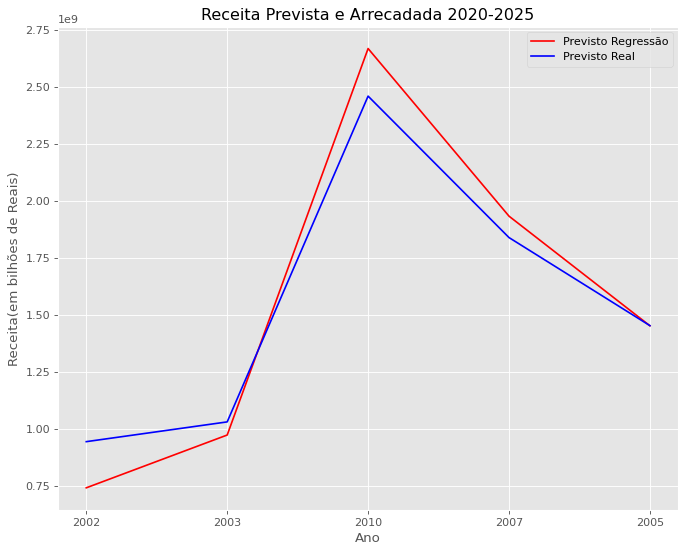

In [0]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(resultado, label='Previsto Regressão',color = 'red')
plt.plot(y_teste, label='Previsto Real',color = 'blue')
plt.legend(['Previsto Regressão', 'Previsto Real'])
plt.title('Receita Prevista e Arrecadada 2020-2025')
plt.ylabel('Receita(em bilhões de Reais)')
plt.xlabel('Ano')
plt.show()